## Using text data

2. You will often encounter text data during fraud detection

During fraud analysis, almost always, there will be some sort of textual data available that you can use to your advantage. It can be emails between the company and its clients, or emails within the company. Descriptions of bank transactions are a good example also. It can be that a client service team leaves notes on a client account. Insurance claims are full of textual data, and it may even be the case that there are recorded telephone conversations. And this list goes on. It is, therefore, important to know how to handle textual data, when working on fraud detection problems.

3. Text mining techniques for fraud detection

When using text data in fraud analysis, there are multiple ways to use the data. A common application is a word search, to flag any data mentioning certain terms. Sentiment analysis, aka measuring how positive or negative a text is, can be another interesting application, which you could also combine with a word search. More straightforward, you can check whether text data associated with fraud tends to be more positive or negative, relative to the normal text. Topic analysis and counting the frequency of certain words of interest, is another powerful application for fraud detection. Let's talk about this in more detail later. A last way to use text data is to analyze the style of fraud data and search for text that is similar in style to flag for fraud.

4. Word search for fraud detection

Suppose you want to flag all client transactions that mention a certain gambling company, as this company has received bad press lately. A simple word search on all transactions and client emails can easily filter whether any of your clients mention this company. You can then either use these results as a filter, or a flag on its own, or simply as an additional feature in your machine learning model. You can do all this with a few simple lines of code. Let's have a look at how it's done.

5. Word counts to flag fraud with pandas

Pandas has functions that allow you to do operations on text data within a pandas series or DataFrame. In this example, I use the string-dot-contains function to find all rows that contain the words money laundering. You can very easily use this command to select the rows that contain these words in your DataFrame. You need to use na equals False to ignore all rows containing missing values, otherwise the indexer won't work. Suppose you want to filter on a list of words, rather than just one. This is also easily done, by the using string contains function. You need to join the list of words with the or command, so you search on whether the text contains this or that word. From then on it is easy to create a flag for data that contain these words. By using the NumPy where function, you can simply create a new variable that flags one where the condition is met, and zero otherwise.

![Alt text](image-24.png)

### Exercise

#### Word search with dataframes
In this exercise you're going to work with text data, containing emails from Enron employees. The Enron scandal is a famous fraud case. Enron employees covered up the bad financial position of the company, thereby keeping the stock price artificially high. Enron employees sold their own stock options, and when the truth came out, Enron investors were left with nothing. The goal is to find all emails that mention specific words, such as "sell enron stock".

By using string operations on dataframes, you can easily sift through messy email data and create flags based on word-hits. The Enron email data has been put into a dataframe called df so let's search for suspicious terms. Feel free to explore df in the Console before getting started.

# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

# Select the data from df using the mask
print(df.loc[mask])

#### Using list of terms
Oftentimes you don't want to search on just one term. You probably can create a full "fraud dictionary" of terms that could potentially flag fraudulent clients and/or transactions. Fraud analysts often will have an idea what should be in such a dictionary. In this exercise you're going to flag a multitude of terms, and in the next exercise you'll create a new flag variable out of it. The 'flag' can be used either directly in a machine learning model as a feature, or as an additional filter on top of your machine learning model results. Let's first use a list of terms to filter our data on. The dataframe containing the cleaned emails is again available as df.

In [ ]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
print(filtered_emails)

#### Creating a flag
This time you are going to create an actual flag variable that gives a 1 when the emails get a hit on the search terms of interest, and 0 otherwise. This is the last step you need to make in order to actually use the text data content as a feature in a machine learning model, or as an actual flag on top of model results. You can continue working with the dataframe df containing the emails, and the searchfor list is the one defined in the last exercise.

In [ ]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

## Text mining to detect fraud

2. Cleaning your text data

Whenever you work with text data, be it for word search, topic modeling, sentiment analysis, or text style, you need to do some rigorous text cleaning in order to be able to work with the data. Here are four steps you must take, before working with the data further. First, you always need to split the text into sentences, and the sentences into words. **Transform everything into lowercase and remove punctuation. This is called tokenization.** Secondly, **you need to remove all stopwords as they mess up your data.** Luckily, there are dictionaries for this to help you do that. Thirdly, **you need to lemmatize words**. For example, this means changing words from ?third person into first person, **changing verbs in past and future tenses into present tenses.** This allows you to combine all words that point to the same thing. Lastly, **all verbs need to be stemmed,** such that they are reduced to their root form. For example, walking and walked are reduced to just their stem, walk.

3. Go from this...

When you take these four steps, it allows you to go from this type of data

![Alt text](image-26.png)

4. To this...

to this nice, clean, structured list of words per dataframe row.

![Alt text](image-25.png)

5. Data preprocessing part 1

Let's look at how to clean your data in practice. Following the four steps, you begin by tokenizing the text data into words. Tokenizers divide strings into lists of substrings. The standard nltk word tokenizer can be used to find the words and punctuation in a string. It splits the words on, for example, white space, and separates the punctuations out. You then use rstrip to remove all the whitespaces from the beginning and end of the strings, and, finally, you make sure all text is lower case, by replacing all letters with their lowercase counterpart, using regular expressions. You then clean the text further by removing stopwords and punctuation. You can use the tokenized text and get rid of all punctuation. Nltk has a stopwords list for the English language that you can use. Since every row consists of a list of strings, you need to create small loops that select the words you want to keep. I use join here to separate the words I want to keep with a space.

![Alt text](image-27.png)

6. Data preprocessing part 2

The next step is to lemmatize the words, this can be easily done with the nltk WordNetLemmatizer. Again, I loop over the words and make sure they are joined together with a space between them. Stemming your verbs is equally simple, you can use the nltk PorterStemmer for this. After this work your text data should be nice and clean. It consists of lists of cleaned words for each row in your dataframe.

![Alt text](image-28.png)

### Exercise

#### Removing stopwords
In the following exercises you're going to clean the Enron emails, in order to be able to use the data in a topic model. Text cleaning can be challenging, so you'll learn some steps to do this well. The dataframe containing the emails df is available. In a first step you need to define the list of stopwords and punctuations that are to be removed in the next exercise from the text data. Let's give it a try.



In [ ]:
# Import nltk packages and string 
from nltk.corpus import stopwords
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

#### Cleaning text data
Now that you've defined the stopwords and punctuations, let's use these to clean our enron emails in the dataframe df further. The lists containing stopwords and punctuations are available under stop and exclude There are a few more steps to take before you have cleaned data, such as "lemmatization" of words, and stemming the verbs. The verbs in the email data are already stemmed, and the lemmatization is already done for you in this exercise.

In [ ]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
print(text_clean)

Now that you have cleaned your data entirely with the necessary steps, including splitting the text into words, removing stopwords and punctuations, and lemmatizing your words. You are now ready to run a topic model on this data.

## Topic modeling on fraud

2. Topic modeling: discover hidden patterns in text data

Topic modeling can be a powerful tool when searching for fraud in text data. Topic modeling allows you to discover abstract topics that occur in a collection of documents. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently. Topic modeling, therefore, **tells us in a very efficient way what the text is about, based on the words it contains.** Conceptually, **it is similar to clustering**, as it clusters words belonging to the same topic together. If you have text data of known fraud cases, it allows you to check what are the most common topics for those fraud cases, and use that to compare unknown cases. Without known labels, you can inspect which topics seem to point to fraudulent behavior and are interesting to further investigate.

3. Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation, or LDA, is an example of topic model and is commonly used. It creates a "topic per text item" model and "words per topic" model, which are called **Dirichlet distributions**. Implementation of LDA is straightforward. First, you need to clean your data as described in the last video, and this is the most work. Then, you create a dictionary containing which words appear how often in all of the text, and also a corpus, containing, for each text line in your data, the count of words that appear.

4. Latent Dirichlet Allocation (LDA)

The results you get from this model are twofold. First, you see how each word in your total data is associated with each topic. Second, you can also see how each text item in your data associates with topics, also in the form of probabilities. You can see this in the image here on the right. This image comes from a blogpost on DataCamp about LDA, which I encourage you to read if you want to learn more in detail.

![Screenshot 2024-06-16 at 23.07.55.png](<attachment:Screenshot 2024-06-16 at 23.07.55.png>)

5. Bag of words: dictionary and corpus

Let's talk about the implementation of an LDA model. You start by **importing the corpora function from gensim**. I use the dictionary function in corpora to create a dictionary from our text data, in this case, from the cleaned emails. The dictionary contains the number of times a word appears for each word. You then filter out words that appear in less than 5 emails and keep only the 50000 most frequent words, in a way of cleaning out the outlier noise of the text data. Last, you create a corpus that tells you, for each email, how many words it contains and how many times those words appear. You can use the doc2bow function for this. Doc2bow stands for document to bag of words. This function converts our text data into a bag-of-words format. That means, each row in our data is now a list of words with their associated word count.

![Screenshot 2024-06-16 at 23.09.51.png](<attachment:Screenshot 2024-06-16 at 23.09.51.png>)

6. Latent Dirichlet Allocation (LDA) with gensim

After cleaning the text data, and creating dictionary and corpus, you are now ready to run your LDA model. I use gensim again for this. You need to pass the corpus and dictionary into the LDA model. As with K-means, you need to pick the number of topics you want beforehand, even if you're not sure yet what the topics are. The LDA model calculated here, now contains the associated words for each topic, and the topic scores per email. You can obtain the top words from the three topics with the function print_topics. As you can see, after running the model, I print the three topics and the four top keywords associated with the topic, for a first interpretation of the results.

![Screenshot 2024-06-16 at 23.11.24.png](<attachment:Screenshot 2024-06-16 at 23.11.24.png>)
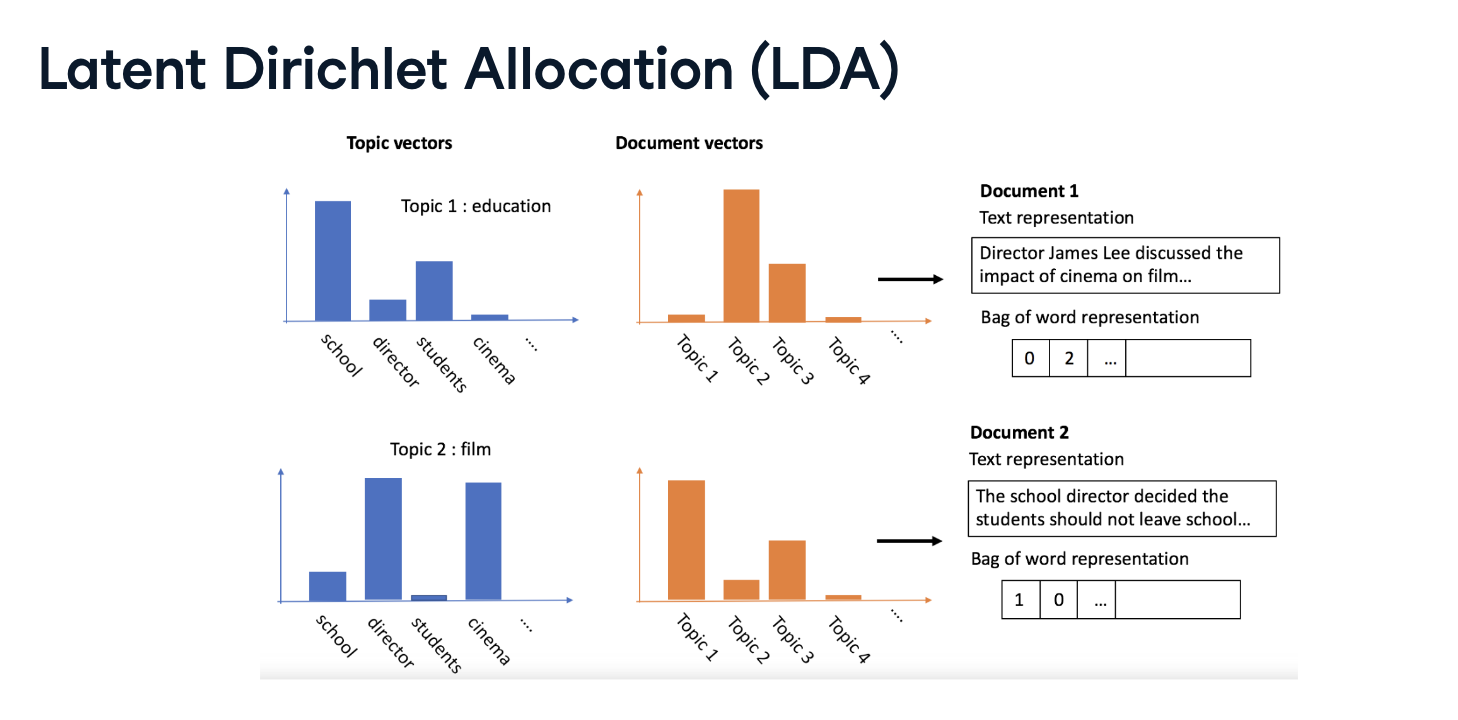
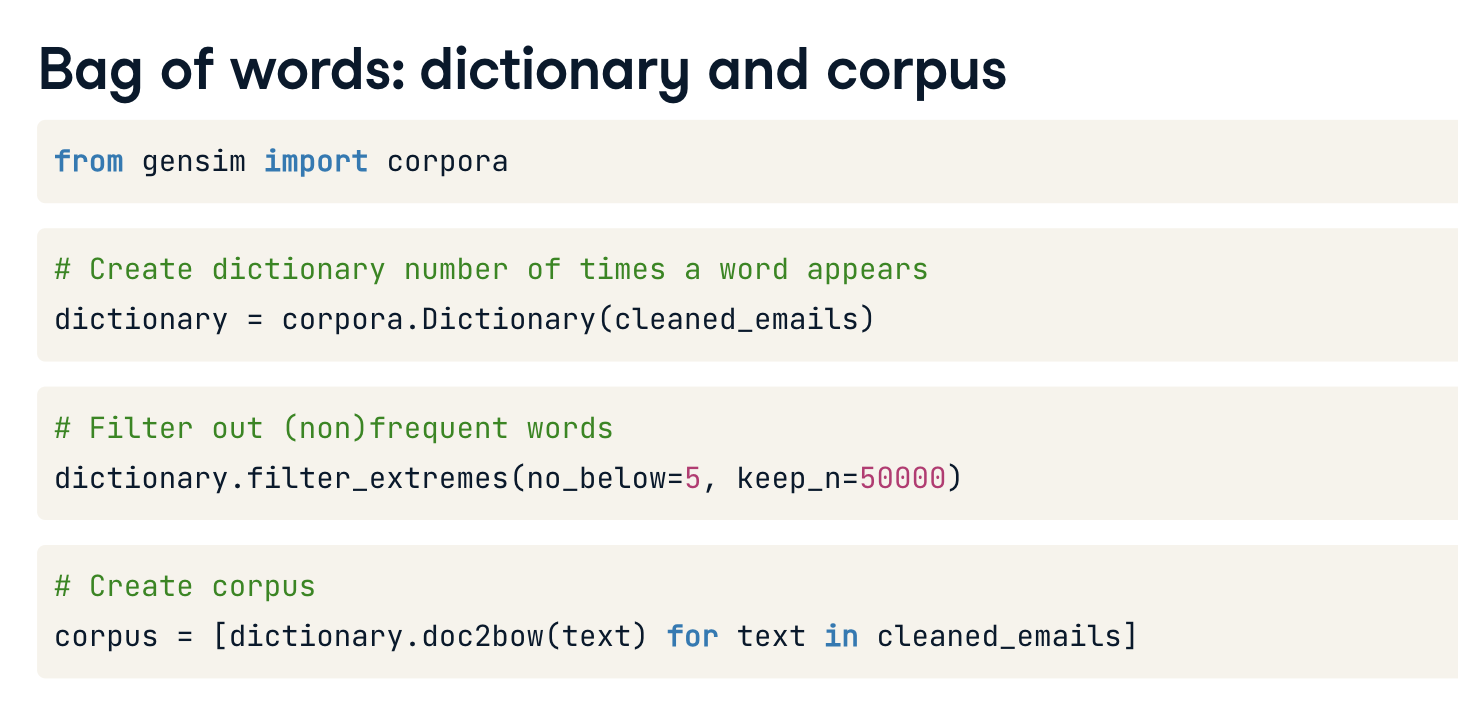
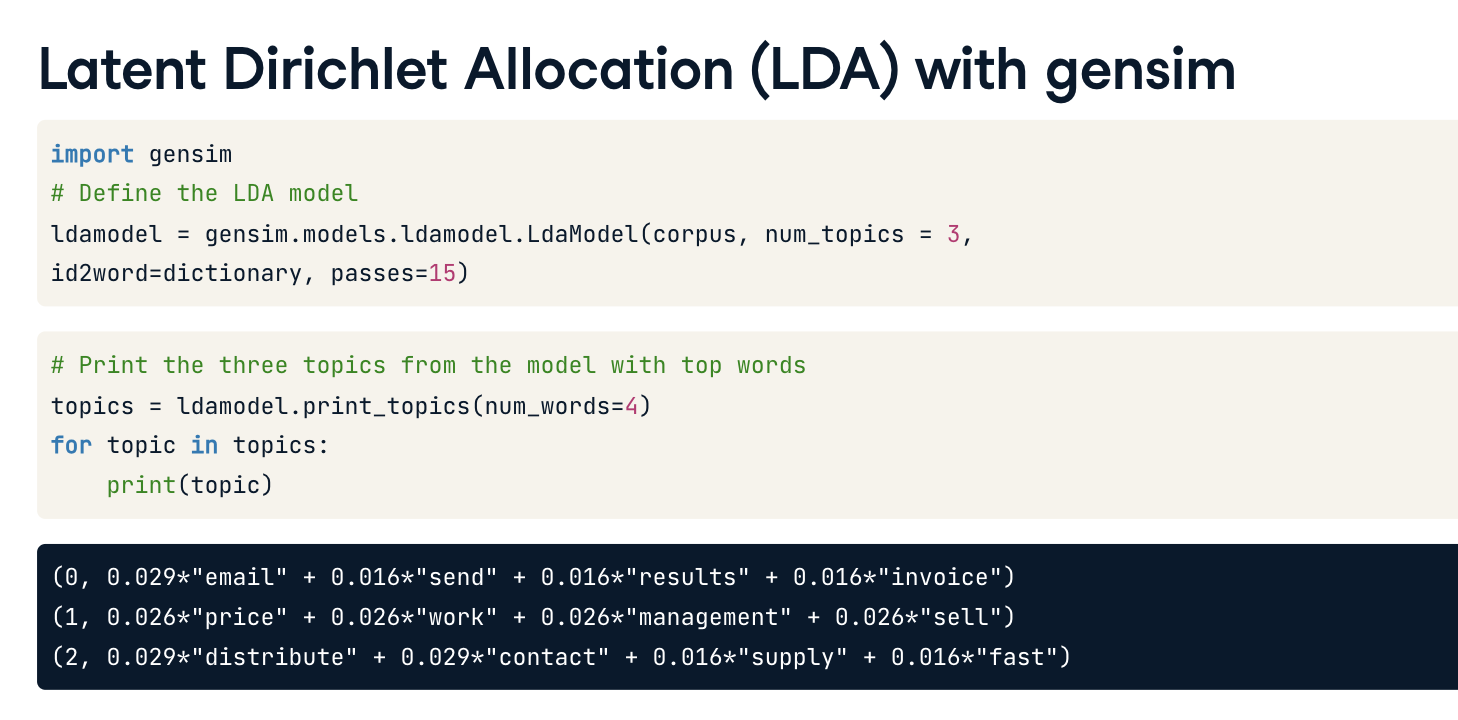

### Exercise

#### Create dictionary and corpus
In order to run an LDA topic model, you first need to define your dictionary and corpus first, as those need to go into the model. You're going to continue working on the cleaned text data that you've done in the previous exercises. That means that text_clean is available for you already to continue working with, and you'll use that to create your dictionary and corpus.

This exercise will take a little longer to execute than usual.

In [ ]:
# Import the packages
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(corpus)
print(dictionary)

#### LDA model
Now it's time to build the LDA model. Using the dictionary and corpus, you are ready to discover which topics are present in the Enron emails. With a quick print of words assigned to the topics, you can do a first exploration about whether there are any obvious topics that jump out. Be mindful that the topic model is heavy to calculate so it will take a while to run. Let's give it a try!

In [ ]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

## Flagging fraud based on topics

2. Using your LDA model results for fraud detection

If you don't have labels, you can first of all check for frequency of suspicious words within topics, and check whether topics seem to describe the fraudulent behavior. For the Enron email data, a suspicious topic would be one where employees are discussing stock bonuses, selling stock, the Enron stock price, and perhaps mentions of accounting or weak financials. Defining suspicious topics does require some pre-knowledge about the fraudulent behavior. If the fraudulent topic is noticeable, you can flag all instances that have a high probability for this topic. If you have previous cases of fraud, you could run a topic model on the fraud text only, as well as on the non-fraud text. Check whether the results are similar, ie whether the frequency of the topics are the same in fraud versus non-fraud. Lastly, you can check whether fraud cases have a higher probability score for certain topics. If so, you can run a topic model on new data and create a flag directly on the instances that score high on those topics.

3. To understand topics, you need to visualize

Interpretation of the abstract topics can sometimes be difficult, so you need good visualization tools to dive deeper and try to understand what the underlying topics mean. There is a visualization tool called **pyLDAvis for gensim** available, that does an excellent job. Be mindful though, this tool only works with Jupyter notebooks. Once you have created your model, you can create a detailed visualization in just two lines of code. As you can see here, I input the model, the corpus, and the dictionary into the pyLDAvis library, and then simply display the results.

![Screenshot 2024-06-16 at 23.18.57.png](<attachment:Screenshot 2024-06-16 at 23.18.57.png>)

4. Inspecting how topics differ

The display looks like this and is interactive. So how to interpret this output? **Each bubble on the left-hand side represents a topic.** The larger the bubble, the more prevalent that topic is. You can **click on each topic to get the details per topic in the right panel**. The words are the most important keywords that form the selected topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart. A model with too many topics, will typically have many overlaps, or small sized bubbles, clustered in one region. In our case, there is a slight overlap between topic two and three, so that may point to one topic too many.

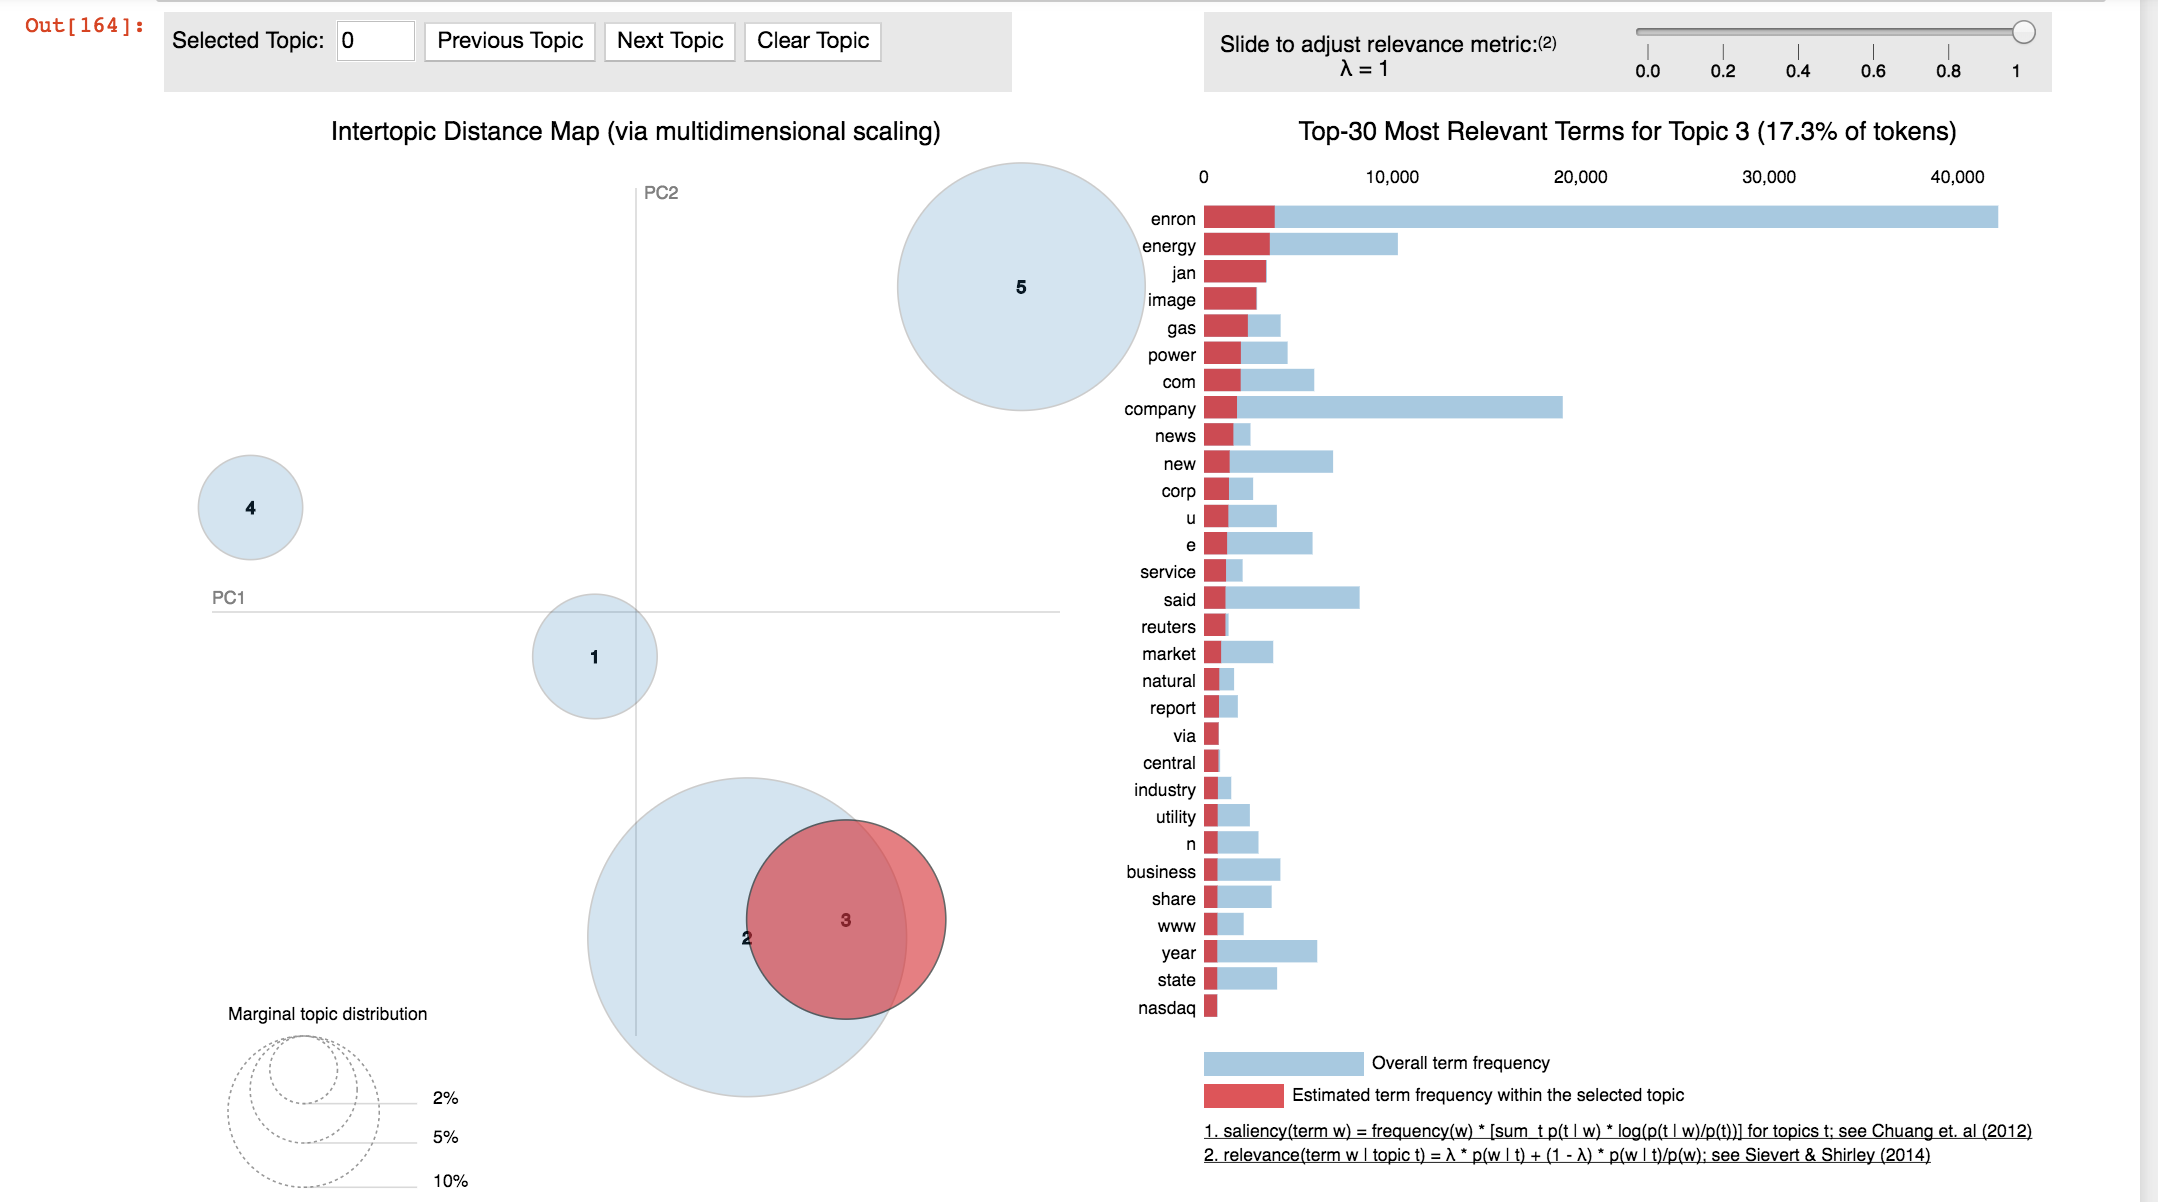

5. Assign topics to your original data

One of the practical application of topic modeling is to determine what topic a given text is about. To find that, you need to find the topic number that has the highest percentage contribution in that text. This is, in fact, not that straightforward. However, the function get_topic_details, shown here, nicely aggregates this information in a presentable table. Going into detail into this function is beyond the scope of this course, but you will get a chance to work with this function in the exercises.

6. Assign topics to your original data

The function can be applied as follows. I take the original text data and combine that with the output of the get_topic_details function. The results looks like this. Each row contains the dominant topic number, the probability score with that topic, and the original text data.

![Screenshot 2024-06-16 at 23.20.50.png](<attachment:Screenshot 2024-06-16 at 23.20.50.png>)
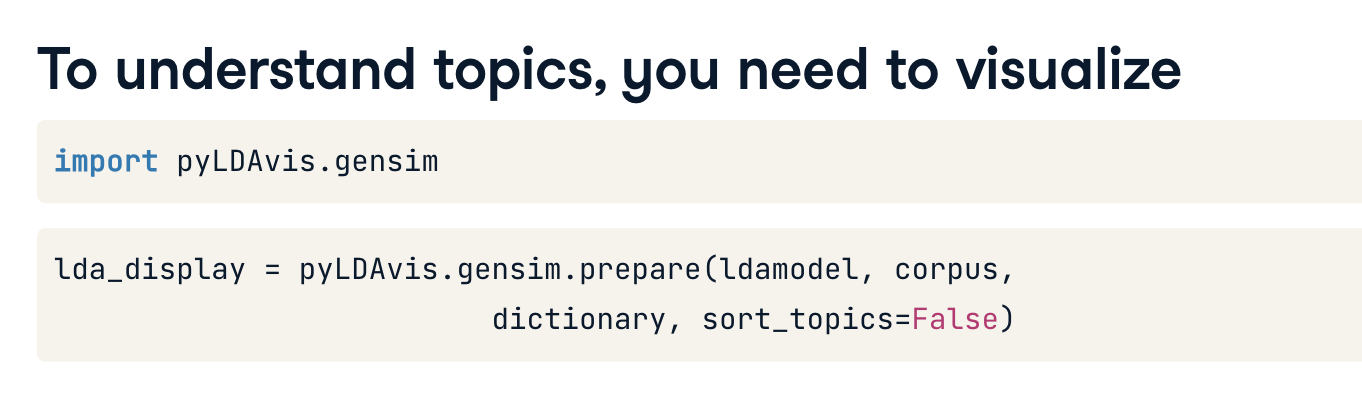
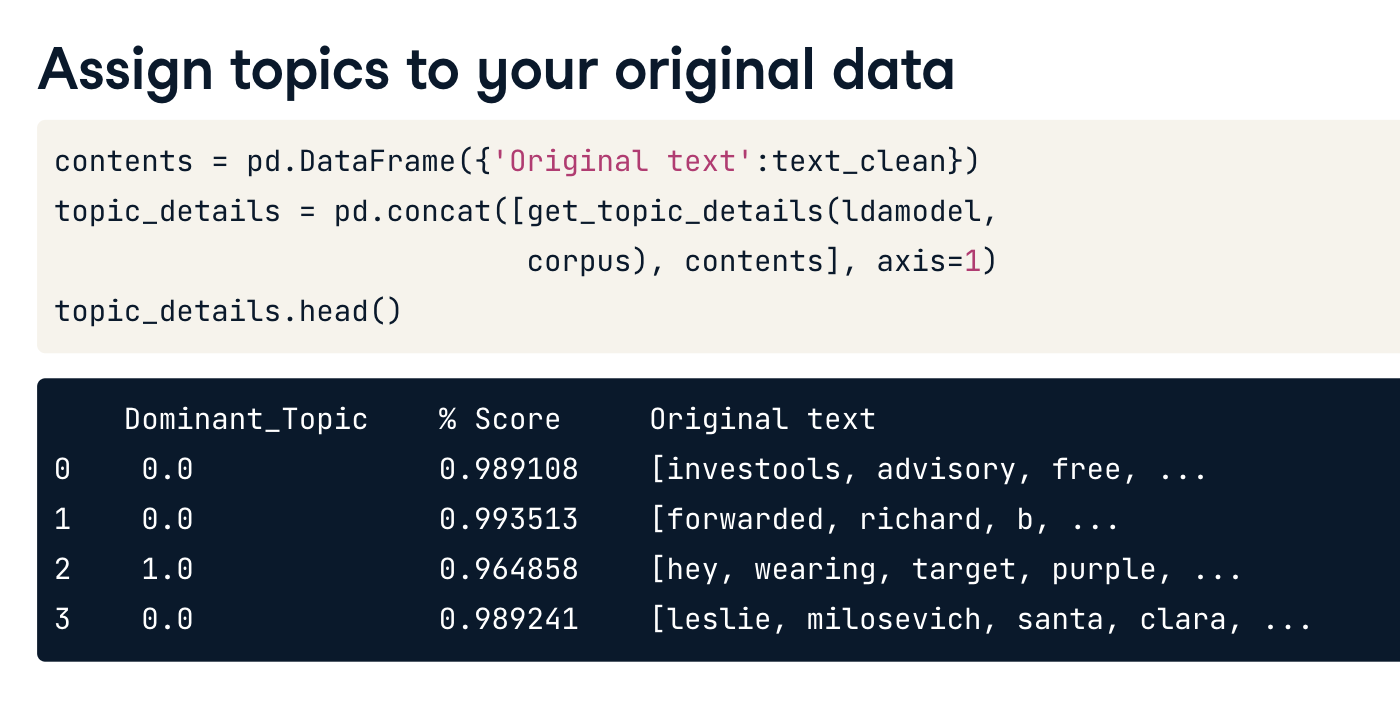

Topic 1 seems to discuss the employee share option program, and seems to point to internal conversation (with "please, may, know" etc), so this is more likely to be related to the internal accounting fraud and trading stock with insider knowledge. Topic 3 seems to be more related to general news around Enron.



### Finding fraudsters based on topic
In this exercise you're going to link the results from the topic model back to your original data. You now learned that you want to flag everything related to topic 3. As you will see, this is actually not that straightforward. You'll be given the function get_topic_details() which takes the arguments ldamodel and corpus. It retrieves the details of the topics for each line of text. With that function, you can append the results back to your original data. If you want to learn more detail on how to work with the model results, which is beyond the scope of this course, you're highly encouraged to read this article.

Available for you are the dictionary and corpus, the text data text_clean as well as your model results ldamodel. Also defined is get_topic_details().

#### 

In [ ]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
print(topic_details.head())